In [1]:
import pandas as pd
import seaborn as se
import numpy as np
import matplotlib.pyplot as plt

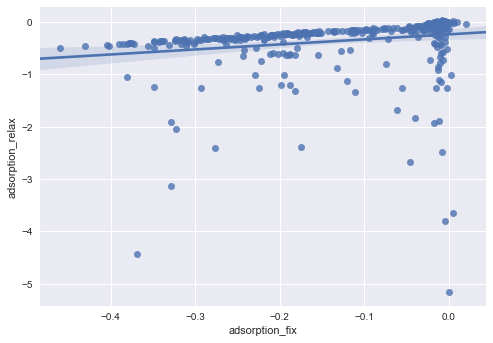

In [23]:
data = pd.read_csv("./zhangjiawei.csv", header=0, index_col=False)
data_fix_relax = data[['adsorption_fix', "adsorption_relax"]]
# data_fix_relax.plot()
se.regplot(x="adsorption_fix", y="adsorption_relax", data=data_fix_relax)
plt.show()


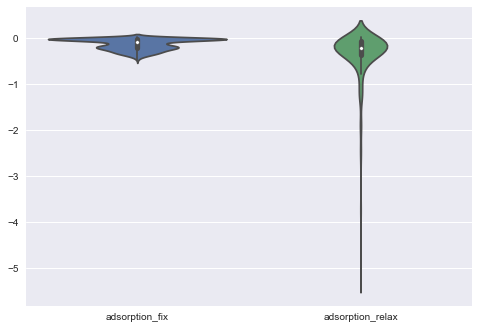

In [20]:
se.violinplot(data=data_fix_relax)
plt.show()

In [13]:
data

,nipratio,nip_dis_average,nini_dis_average,f,d_average,ads_dband,com_x,com_y,com_z,dis_C_Ni,...,Ni_C_x,Ni_C_y,Ni_C_z,Ni_O_x,Ni_O_y,Ni_O_z,Efermi,adsorption_fix,adsorption_relax,relax_part
0,0.400000,3.410579,3.552664,364.421682,-1.244358,-1.278426,125.307317,88.618441,-85.174142,3.312602,...,0.003926,-0.012223,-0.999918,0.114084,-0.057019,-0.991833,-2.7726,-0.028994,-0.061684,-0.03269
1,0.500000,3.578859,3.734861,575.979564,-1.640680,-1.385181,-110.802889,30.193447,-153.792501,3.956434,...,0.001259,-0.007614,-0.999970,-0.152484,-0.144126,-0.977740,-2.6914,-0.001514,-0.006464,-0.00495
2,0.555556,3.523551,3.703720,335.235026,-1.379118,-1.382026,33.155253,66.356625,-112.006689,3.125835,...,0.007028,-0.003208,-0.999970,0.062985,-0.017014,-0.997869,-2.6945,-0.288354,-0.327124,-0.03877
3,0.444444,3.128797,3.222593,5517.794272,-1.710440,-1.795892,47.405228,-6.090467,-103.615605,4.481994,...,-0.000982,0.015079,-0.999886,0.030584,-0.037238,-0.998838,-2.7151,-0.010834,-0.411064,-0.40023
4,0.600000,3.437752,3.674260,479.808977,-1.397983,-1.340977,3.424858,55.604895,-61.124763,3.255895,...,-0.005876,0.004320,-0.999973,0.041411,0.023302,-0.998870,-2.6989,-0.085244,-0.151174,-0.06593
5,0.555556,3.594732,3.751283,285.205770,-1.373332,-1.171458,74.784596,16.775851,-103.183999,3.112201,...,0.007178,0.008919,-0.999934,0.075986,0.027973,-0.996716,-2.5509,-0.306184,-0.342334,-0.03615
6,0.545455,3.423260,3.502030,336.990918,-1.666424,-1.201930,-77.808907,24.942979,-145.991490,4.262489,...,0.001666,0.002213,-0.999996,0.032067,0.108106,-0.993622,-2.6417,-0.007434,-0.578494,-0.57106
7,0.666667,3.636316,3.705207,695.080326,-1.679723,-1.770673,-10.505152,19.137529,-123.042587,3.567579,...,0.001890,0.004814,-0.999987,-0.145623,-0.115031,-0.982630,-2.6528,-0.029014,-0.149234,-0.12022
8,0.545455,3.450504,3.749584,321.811462,-1.183870,-1.252237,8.028754,-35.248370,-180.268353,3.293076,...,-0.000199,-0.003216,-0.999995,0.060275,0.015973,-0.998054,-2.8387,-0.051874,-0.130534,-0.07866
9,0.363636,3.440078,3.451692,641.259281,-1.423542,-1.268614,-80.197623,-64.508533,-147.410250,3.715367,...,-0.056264,0.003346,-0.998410,-0.241955,0.054510,-0.968755,-2.8314,-0.018314,-0.055164,-0.03685


In [42]:
data_features = data[['nipratio', 'nip_dis_average', 'nini_dis_average', 'ads_dband', 'com_x', 'com_y', 'com_z', 'dis_O_Ni', 'Ni_O_x', 'Ni_O_y', 'Ni_O_z', 'Efermi']]
data_features.shape


(387, 12)

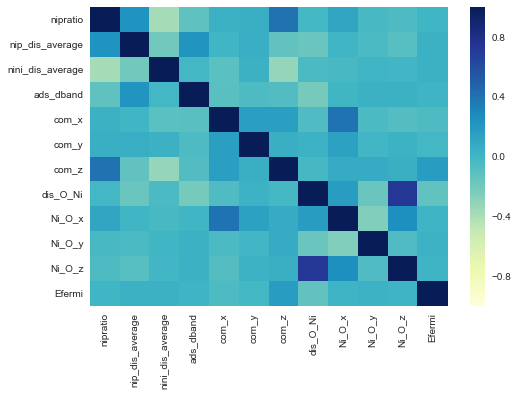

In [43]:
correlations = data_features.corr()
se.heatmap(data=correlations, cmap="YlGnBu")
plt.show()

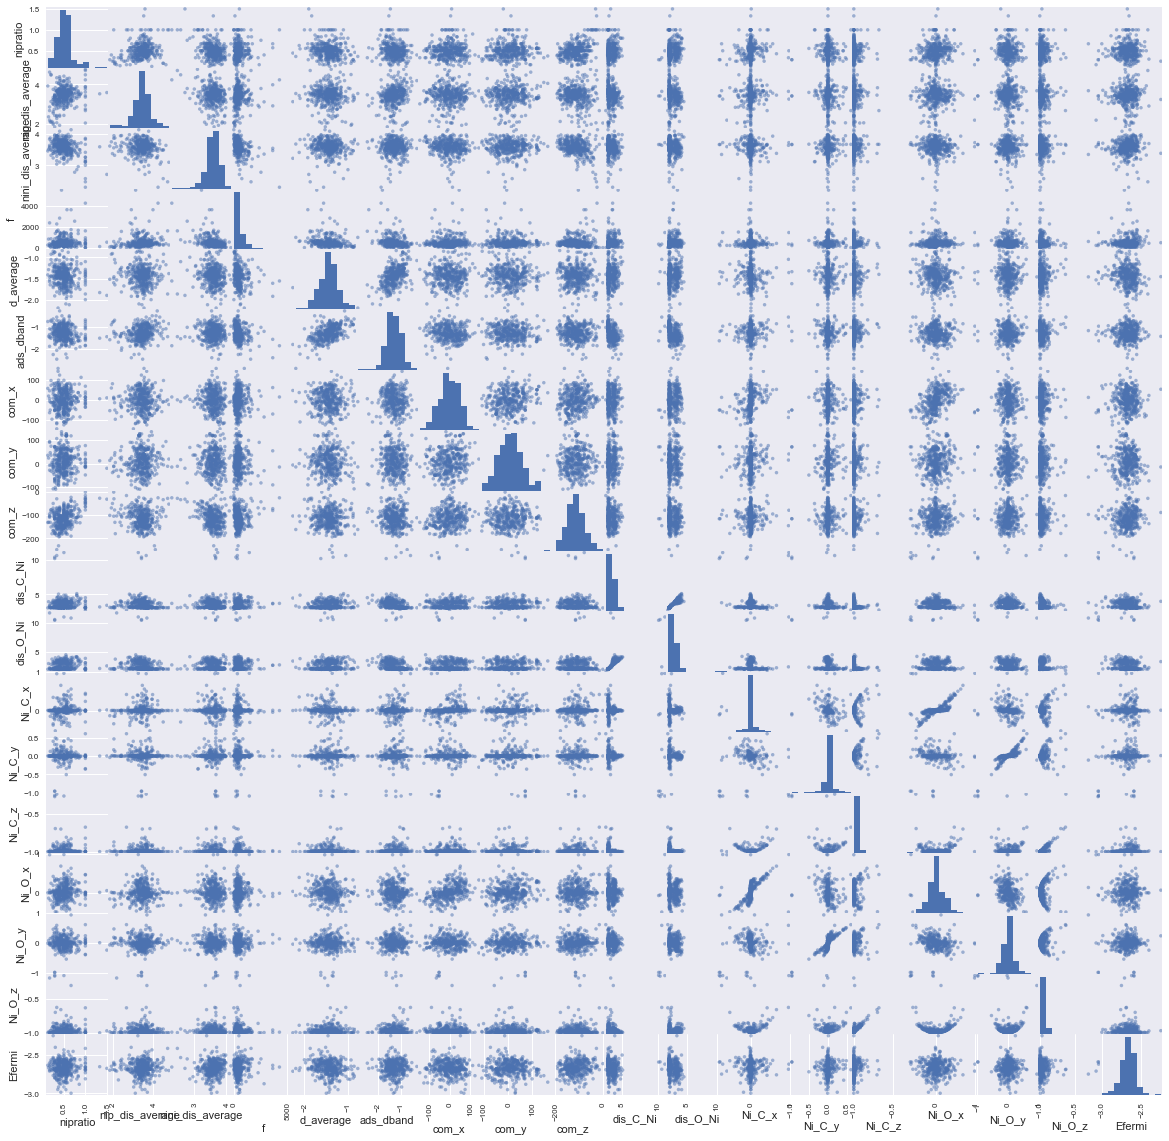

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_features, figsize=(20, 20))
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

0.0116689002283
0.351502951587


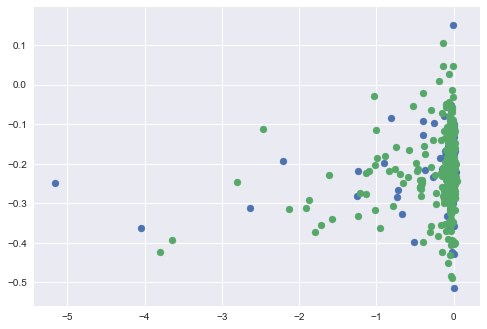

In [59]:
X = data_features.values
y = data['relax_part']

X_train, X_test, y_train, y_test = train_test_split(X, y)

Scaler = StandardScaler()
x_train = Scaler.fit_transform(X_train)
x_test = Scaler.transform(X_test)

myridge = Ridge()
# gbdt = GradientBoostingRegressor()
myridge.fit(x_train, y_train)

y_predict = myridge.predict(x_test)
print(myridge.score(x_test, y_test))
print(mean_absolute_error(y_test, y_predict))

plt.scatter(y_test, y_predict)
plt.scatter(y_train, myridge.predict(x_train))
plt.show()